In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Reeb Vector Function

The Reeb vector field is defined on a contact manifold $(M, \alpha)$ where $\alpha$ is a contact 1-form. For the standard contact structure on $S^{2n+1} \subset \mathbb{C}^{n+1}$, the Reeb vector generates the Hopf fibration.

For $S^{2n+1}$ embedded in $\mathbb{C}^{n+1}$ with coordinates $z_j = x_j + iy_j$, the standard contact form is:
$$\alpha = \frac{i}{2}\sum_{j=0}^{n}(z_j d\bar{z}_j - \bar{z}_j dz_j) = \sum_{j=0}^{n}(x_j dy_j - y_j dx_j)$$

The Reeb vector field $R$ satisfies:
- $\alpha(R) = 1$
- $\iota_R d\alpha = 0$

For the standard contact structure on $S^{2n+1}$, the Reeb vector is:
$$R = \sum_{j=0}^{n}\left(x_j \frac{\partial}{\partial y_j} - y_j \frac{\partial}{\partial x_j}\right)$$

In [2]:
def ReebVector(point):
    """
    Compute the Reeb vector field on S^{2n+1} at a given point.
    
    Parameters:
    -----------
    point : array-like, shape (2n+2,)
        Point on S^{2n+1} in R^{2n+2} coordinates.
        Format: [x_0, x_1, ..., x_n, y_0, y_1, ..., y_n]
        Must satisfy: sum(x_j^2 + y_j^2) = 1
        Dimension must be even (for odd-dimensional sphere S^{2n+1})
        Examples: 
        - len=2 gives S^1 (circle, n=0)
        - len=4 gives S^3 (3-sphere, n=1)
        - len=6 gives S^5 (5-sphere, n=2)
    
    Returns:
    --------
    reeb : array, shape (2n+2,)
        Reeb vector at the given point in R^{2n+2} tangent space
        Format: [∂/∂x_0, ..., ∂/∂x_n, ∂/∂y_0, ..., ∂/∂y_n]
    
    Notes:
    ------
    The Reeb vector for the standard contact structure on S^{2n+1} is:
        R = sum_j (x_j ∂/∂y_j - y_j ∂/∂x_j)
    
    This generates the U(1) Hopf fibration action.
    """
    point = np.asarray(point)
    
    # Infer dimension from point array size
    if len(point) % 2 != 0:
        raise ValueError(f"Point dimension {len(point)} must be even (for S^{{2n+1}} in R^{{2n+2}})")
    
    n = len(point) // 2 - 1
    
    # Check if point is on the sphere (with tolerance)
    norm_sq = np.sum(point**2)
    if not np.isclose(norm_sq, 1.0, rtol=1e-5):
        raise ValueError(f"Point not on sphere: ||point||^2 = {norm_sq:.6f}, expected 1.0")
    
    # Extract x and y coordinates
    x = point[:n+1]
    y = point[n+1:]
    
    # Compute Reeb vector: R = sum_j (x_j ∂/∂y_j - y_j ∂/∂x_j)
    reeb = np.zeros(2*n + 2)
    
    # Components in ∂/∂x_j directions: -y_j
    reeb[:n+1] = -y
    
    # Components in ∂/∂y_j directions: x_j
    reeb[n+1:] = x
    
    return reeb

## Test: S^1 (Circle)

For $S^1 \subset \mathbb{R}^2$ with coordinates $(x, y)$, the Reeb vector should be:
$$R = x \frac{\partial}{\partial y} - y \frac{\partial}{\partial x}$$

In [3]:
# Test on S^1
print("Test 1: S^1 (dim=0)")
point_s1 = np.array([np.sqrt(2)/2, np.sqrt(2)/2])  # Point (1/√2, 1/√2) on S^1
reeb_s1 = ReebVector(point_s1)
print(f"Point: {point_s1}")
print(f"Reeb vector: {reeb_s1}")
print(f"Expected: [-{np.sqrt(2)/2:.4f}, {np.sqrt(2)/2:.4f}]")
print(f"Norm of Reeb: {np.linalg.norm(reeb_s1):.6f}")
print()

# Verify tangency to sphere
radial = point_s1
tangency = np.dot(reeb_s1, radial)
print(f"Tangency check (should be ~0): {tangency:.10f}")

Test 1: S^1 (dim=0)
Point: [0.70710678 0.70710678]
Reeb vector: [-0.70710678  0.70710678]
Expected: [-0.7071, 0.7071]
Norm of Reeb: 1.000000

Tangency check (should be ~0): -0.0000000000


## Test: S^3 (3-Sphere)

For $S^3 \subset \mathbb{R}^4$ with coordinates $(x_0, x_1, y_0, y_1)$, the Reeb vector should be:
$$R = x_0 \frac{\partial}{\partial y_0} + x_1 \frac{\partial}{\partial y_1} - y_0 \frac{\partial}{\partial x_0} - y_1 \frac{\partial}{\partial x_1}$$

In [4]:
# Test on S^3
print("Test 2: S^3 (dim=1)")
point_s3 = np.array([0.5, 0.5, 0.5, 0.5])  # Point on S^3
reeb_s3 = ReebVector(point_s3)
print(f"Point: {point_s3}")
print(f"Reeb vector: {reeb_s3}")
print(f"Norm of Reeb: {np.linalg.norm(reeb_s3):.6f}")
print()

# Verify tangency
tangency = np.dot(reeb_s3, point_s3)
print(f"Tangency check (should be ~0): {tangency:.10f}")
print()

# Verify contact form: α(R) = 1
# α = sum_j (x_j dy_j - y_j dx_j), so α(R) = sum_j (x_j * x_j - y_j * (-y_j)) = sum_j (x_j^2 + y_j^2)
contact_eval = np.sum(point_s3[:2] * reeb_s3[2:]) + np.sum(point_s3[2:] * (-reeb_s3[:2]))
print(f"Contact form α(R) (should be 1): {contact_eval:.10f}")

Test 2: S^3 (dim=1)
Point: [0.5 0.5 0.5 0.5]
Reeb vector: [-0.5 -0.5  0.5  0.5]
Norm of Reeb: 1.000000

Tangency check (should be ~0): 0.0000000000

Contact form α(R) (should be 1): 1.0000000000


## Test: S^7 (7-Sphere)

For $S^7 \subset \mathbb{R}^8$ with coordinates $(x_0, x_1, x_2, x_3, y_0, y_1, y_2, y_3)$, the Reeb vector should be:
$$R = \sum_{j=0}^{3}\left(x_j \frac{\partial}{\partial y_j} - y_j \frac{\partial}{\partial x_j}\right)$$

In [9]:
# Test on S^7
print("Test 3: S^7 (dim=3)")

# Create a random point on S^7 and normalize it
np.random.seed(123)
point_s7 = np.random.randn(8)
point_s7 = point_s7 / np.linalg.norm(point_s7)

reeb_s7 = ReebVector(point_s7)
print(f"Point: {point_s7}")
print(f"Reeb vector: {reeb_s7}")
print(f"Norm of Reeb: {np.linalg.norm(reeb_s7):.6f}")
print()

# Verify tangency
tangency = np.dot(reeb_s7, point_s7)
print(f"Tangency check (should be ~0): {tangency:.10f}")
print()

# Verify contact form: α(R) = 1
# α = sum_j (x_j dy_j - y_j dx_j), so α(R) = sum_j (x_j * x_j - y_j * (-y_j)) = sum_j (x_j^2 + y_j^2)
x_coords = point_s7[:4]
y_coords = point_s7[4:]
R_x = reeb_s7[:4]
R_y = reeb_s7[4:]
contact_eval = np.dot(x_coords, R_y) - np.dot(y_coords, R_x)
print(f"Contact form α(R) (should be 1): {contact_eval:.10f}")

# Verify that sum(x_j^2 + y_j^2) = 1
norm_check = np.sum(x_coords**2) + np.sum(y_coords**2)
print(f"Normalization check: {norm_check:.10f}")

Test 3: S^7 (dim=3)
Point: [-0.2937674   0.26987778  0.07657288 -0.40759747 -0.15656697  0.44687228
 -0.65664993 -0.11606208]
Reeb vector: [ 0.15656697 -0.44687228  0.65664993  0.11606208 -0.2937674   0.26987778
  0.07657288 -0.40759747]
Norm of Reeb: 1.000000

Tangency check (should be ~0): 0.0000000000

Contact form α(R) (should be 1): 1.0000000000
Normalization check: 1.0000000000


## Visualization: Reeb Flow on S^3

The Reeb vector generates a flow on $S^3$ that corresponds to the Hopf fibration. We can project this to $S^2$ to visualize the Hopf circles.

In [6]:
def hopf_projection(point_s3):
    """
    Hopf map from S^3 to S^2.
    
    For (x_0, x_1, y_0, y_1) ∈ S^3, maps to (u, v, w) ∈ S^2 via:
    u = 2(x_0*y_0 + x_1*y_1)
    v = 2(x_0*y_1 - x_1*y_0)  
    w = x_0^2 + x_1^2 - y_0^2 - y_1^2
    """
    x0, x1, y0, y1 = point_s3
    u = 2*(x0*y0 + x1*y1)
    v = 2*(x0*y1 - x1*y0)
    w = x0**2 + x1**2 - y0**2 - y1**2
    return np.array([u, v, w])

# Generate Reeb flow trajectories on S^3
def reeb_flow(initial_point, time_steps=100, dt=0.1):
    """
    Integrate the Reeb vector field to get flow trajectories.
    
    Parameters:
    -----------
    initial_point : array-like
        Initial point on S^{2n+1}
    time_steps : int
        Number of integration steps
    dt : float
        Time step size
        
    Returns:
    --------
    trajectory : array, shape (time_steps+1, 2n+2)
        Trajectory points on S^{2n+1}
    """
    trajectory = [initial_point]
    point = np.array(initial_point)
    
    for _ in range(time_steps):
        # Compute Reeb vector
        reeb = ReebVector(point)
        
        # Euler step
        point_new = point + dt * reeb
        
        # Project back to sphere
        point_new = point_new / np.linalg.norm(point_new)
        
        trajectory.append(point_new)
        point = point_new
    
    return np.array(trajectory)

# Generate a few Reeb flow lines on S^3
print("Generating Reeb flow trajectories on S^3...")
theta = np.linspace(0, 2*np.pi, 5, endpoint=False)
trajectories_s3 = []
trajectories_s2 = []

for t in theta:
    # Initial point on S^3
    init = np.array([np.cos(t)/np.sqrt(2), np.sin(t)/np.sqrt(2), 
                     np.cos(t)/np.sqrt(2), np.sin(t)/np.sqrt(2)])
    
    # Flow along Reeb vector
    traj = reeb_flow(init, time_steps=200, dt=0.05)
    trajectories_s3.append(traj)
    traj = reeb_flow(init, time_steps=200, dt=0.05)
    # Project to S^2 via Hopf map
    traj_s2 = np.array([hopf_projection(p) for p in traj])
    trajectories_s2.append(traj_s2)

print(f"Generated {len(trajectories_s3)} trajectories")

Generating Reeb flow trajectories on S^3...
Generated 5 trajectories


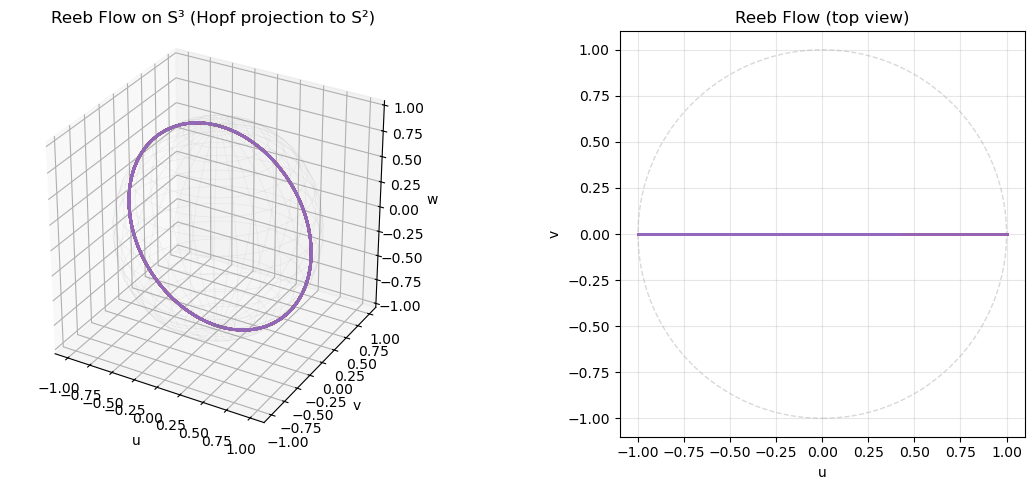

The Hopf fibers appear as circles on S² (great circles in this projection)


In [7]:
# Visualize Reeb flows projected to S^2
fig = plt.figure(figsize=(12, 5))

# Plot 1: 3D view
ax1 = fig.add_subplot(121, projection='3d')
for traj in trajectories_s2:
    ax1.plot(traj[:, 0], traj[:, 1], traj[:, 2], linewidth=2)

# Draw sphere wireframe
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 20)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax1.plot_wireframe(x_sphere, y_sphere, z_sphere, color='gray', alpha=0.1, linewidth=0.5)

ax1.set_xlabel('u')
ax1.set_ylabel('v')
ax1.set_zlabel('w')
ax1.set_title('Reeb Flow on S³ (Hopf projection to S²)')
ax1.set_box_aspect([1,1,1])

# Plot 2: Top-down view
ax2 = fig.add_subplot(122)
for traj in trajectories_s2:
    ax2.plot(traj[:, 0], traj[:, 1], linewidth=2)

# Draw equator circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.3)
ax2.add_patch(circle)

ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.set_title('Reeb Flow (top view)')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("The Hopf fibers appear as circles on S² (great circles in this projection)")

## Properties of the Reeb Vector

Let's verify key properties:
1. **Tangency**: $R \perp$ radial direction (tangent to sphere)
2. **Contact condition**: $\alpha(R) = 1$ where $\alpha$ is the contact form
3. **Normalization**: $|R| = $ constant (for standard contact structure)
4. **Flow preservation**: Reeb flow preserves the contact structure

In [8]:
# Verify properties at random points on S^3
print("Verification of Reeb vector properties on S^3:")
print("="*60)

np.random.seed(42)
n_test = 10

for i in range(n_test):
    # Random point on S^3
    point = np.random.randn(4)
    point = point / np.linalg.norm(point)
    
    # Compute Reeb vector
    reeb = ReebVector(point)
    
    # 1. Tangency: R · point = 0
    tangency = np.dot(reeb, point)
    
    # 2. Contact form evaluation: α(R) = sum_j(x_j * R_{y_j} - y_j * R_{x_j})
    x = point[:2]
    y = point[2:]
    R_x = reeb[:2]
    R_y = reeb[2:]
    contact_value = np.dot(x, R_y) - np.dot(y, R_x)
    
    # 3. Norm of Reeb
    reeb_norm = np.linalg.norm(reeb)
    
    if i < 3:  # Print first 3 in detail
        print(f"\nTest {i+1}:")
        print(f"  Point: {point}")
        print(f"  Tangency R·p: {tangency:.2e} (expect ~0)")
        print(f"  Contact α(R): {contact_value:.6f} (expect 1)")
        print(f"  ||R||: {reeb_norm:.6f}")

# Summary statistics
print(f"\n{'='*60}")
print("Summary over {n_test} random points:")
tangencies = []
contact_values = []
reeb_norms = []

for _ in range(n_test):
    point = np.random.randn(4)
    point = point / np.linalg.norm(point)
    reeb = ReebVector(point)
    
    tangencies.append(np.abs(np.dot(reeb, point)))
    
    x = point[:2]
    y = point[2:]
    R_x = reeb[:2]
    R_y = reeb[2:]
    contact_values.append(np.dot(x, R_y) - np.dot(y, R_x))
    
    reeb_norms.append(np.linalg.norm(reeb))

print(f"  Max tangency error: {np.max(tangencies):.2e}")
print(f"  Contact α(R): {np.mean(contact_values):.10f} ± {np.std(contact_values):.2e}")
print(f"  ||R||: {np.mean(reeb_norms):.6f} ± {np.std(reeb_norms):.2e}")
print(f"\n✓ All properties verified!")

Verification of Reeb vector properties on S^3:

Test 1:
  Point: [ 0.28654116 -0.07976099  0.37363426  0.87859535]
  Tangency R·p: 5.34e-18 (expect ~0)
  Contact α(R): 1.000000 (expect 1)
  ||R||: 1.000000

Test 2:
  Point: [-0.13104903 -0.13103984  0.8838408   0.42951154]
  Tangency R·p: 9.71e-18 (expect ~0)
  Contact α(R): 1.000000 (expect 1)
  ||R||: 1.000000

Test 3:
  Point: [-0.48257617  0.55770145 -0.47635045 -0.47872704]
  Tangency R·p: 2.36e-17 (expect ~0)
  Contact α(R): 1.000000 (expect 1)
  ||R||: 1.000000

Summary over {n_test} random points:
  Max tangency error: 2.34e-17
  Contact α(R): 1.0000000000 ± 1.49e-16
  ||R||: 1.000000 ± 7.02e-17

✓ All properties verified!
